In [1]:
import numpy as np

import os
os.chdir('..')

base_dir = os.getcwd()
print(base_dir)

/home/ale/Code/estelas


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


In [3]:
from load_txt_datos import cargar_datos

file = 'U_superficie_gondolas_337.raw'
path = os.path.join(base_dir, 'data', file)

x, y, z, u, v, w = cargar_datos('isosuperficie', path)

minx, maxx = x.min(), x.max()
miny, maxy = y.min(), y.max()

print(minx, maxx)
print(miny, maxy)

0.0 6492.0
0.0 6316.0


In [29]:
from scipy.interpolate import griddata

npois = 100
npoiX, npoiY = npois, npois

meshXmin, meshXmax = 1000, 5000
meshYmin, meshYmax = 1000, 5000

xg = np.linspace(meshXmin, meshXmax, npoiX)
yg = np.linspace(meshYmin, meshYmax, npoiY)

XG, YG = np.meshgrid(xg, yg)

# Vertical displacement of mesh nodes
ZG = griddata((x, y), z, (XG, YG), method='linear')
UG = griddata((x, y), u, (XG, YG), method='linear')
VG = griddata((x, y), v, (XG, YG), method='linear')
WG = griddata((x, y), w, (XG, YG), method='linear')

# %timeit WG = griddata((x, y), w, (XG, YG), method='linear')
# %timeit WG = griddata((x, y), w, (XG, YG), method='cubic')

In [9]:
# from Iso_Superficie import Iso_Superficie
# isosup = Iso_Superficie(x, y, z, u, v, w)

In [20]:
from scipy.interpolate import interp2d

# %timeit interp_u = interp2d(XG, YG, UG)
# interp_u = interp2d(XG, YG, UG)
# %timeit interp_u(2000, 2000)

# La forma siguiente tarda 4 órdenes de magnitud menos con 100*100 puntos
# y 5 órdenes para 200 puntos
%timeit interp_u2 = interp2d(xg, yg, UG, kind='linear')
interp_u2 = interp2d(xg, yg, UG)
%timeit interp_u2(2000, 2000)

1.35 ms ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.4 µs ± 21.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
from scipy.interpolate import RectBivariateSpline

# Esta forma tarda unas 6 veces menos en las evaluaciones, la definición tarda igual
%timeit interp_u2 = RectBivariateSpline(xg, yg, UG, kx=1, ky=1)
interp_u2 = RectBivariateSpline(xg, yg, UG)
%timeit interp_u2(2000, 2000)

1.31 ms ± 6.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.21 µs ± 8.09 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
_interp_u = RectBivariateSpline(xg, yg, UG)
_interp_v = RectBivariateSpline(xg, yg, VG)
_interp_w = RectBivariateSpline(xg, yg, WG)
_interp_z = RectBivariateSpline(xg, yg, ZG)

In [100]:
def _makeHalfStreamline(x0, y0, xmin, xmax, ymin, ymax, dr, sign):
    """
    Compute a streamline extending in one direction from the given point.
    """
    # TODO: can we vectorize this?
    
    sx = []
    sy = []

    x = x0
    y = y0

    while xmin < x < xmax and ymin < y < ymax:
        sx.append(x)
        sy.append(y)
        
#         print(x, y)

        u = _interp_u(x, y).item()
        v = _interp_v(x, y).item()
        
#         print(u, v)
        scale = sign * (dr / np.sqrt(u**2 + v**2))

        x += scale * u
        y += scale * v


    return sx, sy


In [104]:
# %%timeit
x0 = list(range(1100, 5000, 500)) 
y0 = [4900] * len(x0)

# print(_interp_u([meshXmin] , [meshYmin]).item())

dr = 200
sign = 1

streamlines = [_makeHalfStreamline(*xy, meshXmin, meshXmax, meshYmin, meshYmax, dr, sign) for xy in zip(x0, y0)]

# streamline = _makeHalfStreamline(x0, y0, meshXmin, meshXmax, meshYmin, meshYmax, dr, sign)

# print(len(streamline[0]))

In [105]:
streamlines

[([1100,
   1174.9701005191707,
   1250.1693226881064,
   1325.4722169959987,
   1401.169538882595,
   1477.7476271493283,
   1556.125250626845,
   1636.045486143312,
   1715.6882265701101,
   1794.9431162299722,
   1871.9886450518136,
   1947.8304902088996,
   2023.2607350097123,
   2099.0463207962084,
   2176.1997746341262,
   2254.158354091438,
   2332.327457948779,
   2410.230552572988,
   2488.1919300481386,
   2567.1194329765226,
   2647.1114630286356,
   2728.0692020934907],
  [4900,
   4714.5829456922975,
   4529.258697453738,
   4343.9765501516995,
   4158.85519682044,
   3974.096444937309,
   3790.093868493346,
   3606.756049277036,
   3423.297514732279,
   3239.671093798354,
   3055.106778481002,
   2870.044587520318,
   2684.814249375376,
   2499.729012289871,
   2315.2097868392957,
   2131.029277856944,
   1946.9380200467476,
   1762.7340357033804,
   1578.5547110706273,
   1394.787332895147,
   1211.4808269327514,
   1028.5987761855367]),
 ([1600,
   1675.5434789024064,
 

<IPython.core.display.Javascript object>


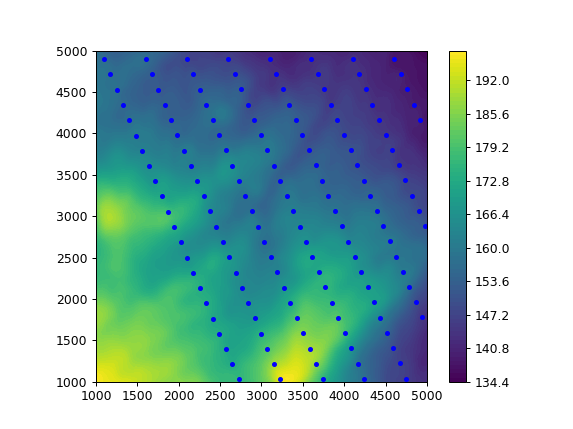

<IPython.core.display.Javascript object>


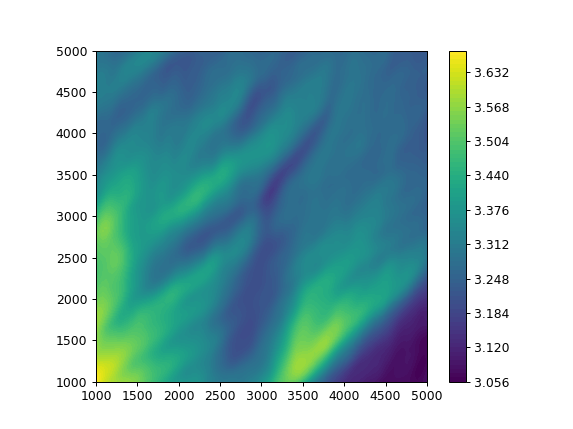

<IPython.core.display.Javascript object>


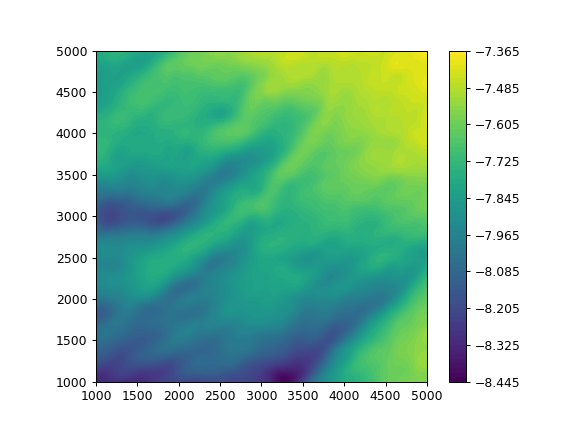

In [111]:
# print(len(streamline[0]))

fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

count = ax.contourf(XG, YG, ZG, 100)
# ax.plot(*streamline, '.')

for line in streamlines:
    ax.plot(*line, '.b')

fig1.colorbar(count)
ax.set_aspect('equal', 'box')

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
countu = ax2.contourf(XG, YG, UG, 100)
fig2.colorbar(countu)
ax2.set_aspect('equal', 'box')

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
countv = ax3.contourf(XG, YG, VG, 100)
fig3.colorbar(countv)
ax3.set_aspect('equal', 'box')


In [30]:
hubheight = 80

In [13]:
(2*60 + 27) *1000



147000

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(isosup.x, isosup.y, isosup.z, c='r', marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()